In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

bike = pd.read_csv('train_bikedata.csv')
bike.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [79]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [80]:
# object type을 날짜 type으로 변환
bike['datetime'] = bike.datetime.apply(pd.to_datetime)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [81]:
bike['year'] = bike.datetime.apply(lambda x: x.year)
bike['month'] = bike.datetime.apply(lambda x: x.month)
bike['day'] = bike.datetime.apply(lambda x: x.day)
bike['hour'] = bike.datetime.apply(lambda x: x.hour)

bike.sample(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
6892,2012-04-05 12:00:00,2,0,1,1,18.04,21.97,33,0.0000,66,210,276,2012,4,5,12
1421,2011-04-05 02:00:00,2,0,1,2,22.14,25.76,73,22.0028,0,5,5,2011,4,5,2
4984,2011-12-01 18:00:00,4,0,1,1,14.76,18.18,43,7.0015,12,393,405,2011,12,1,18


In [82]:
bike.drop(columns=['datetime','casual', 'registered'], inplace=True)
bike.sample(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
6743,1,0,0,2,16.40,20.455,94,7.0015,11,2012,3,18,6
7491,2,0,1,1,22.96,26.515,28,27.9993,348,2012,5,11,12
2139,2,0,1,1,21.32,25.000,94,8.9981,14,2011,5,16,1


In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = mean_squared_error(y, pred, squared=False)
    mae_val = mean_absolute_error(y, pred)
    print(f"rmsle:\t{rmsle_val}\nrmse:\t{rmse_val}\nmae:\t{mae_val}")

In [84]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import warnings
warnings.filterwarnings('ignore')

x = bike.drop(columns='count')
y = bike['count']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

rmsle:	1.1646636237108705
rmse:	140.8995886716558
mae:	105.92444835101169


In [85]:
def get_tor_error_data(y_test, pred, n_tops=5):
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])

    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_tor_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<Axes: >

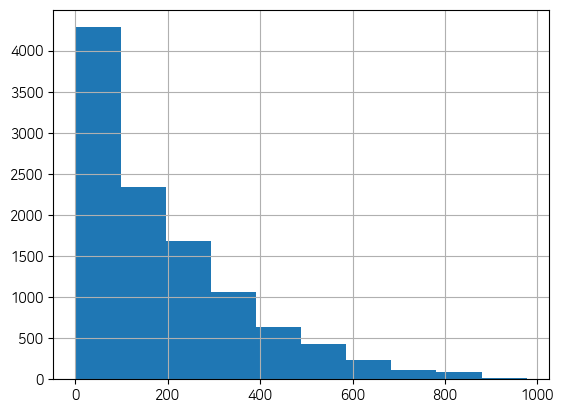

In [86]:
y.hist()

<Axes: >

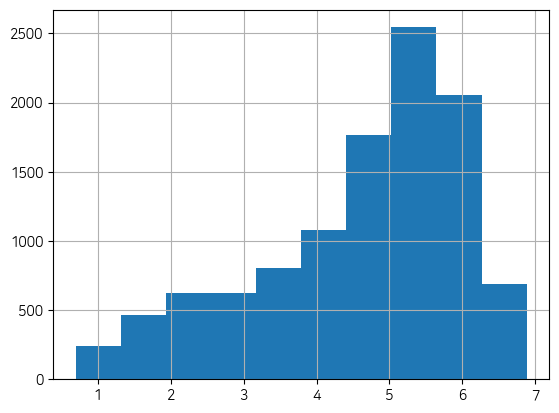

In [87]:
# 정규분포에 가까운 형태로 변환
# (별로 정규분포 같지는 않다)
y_log = np.log1p(y)
y_log.hist()

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x, y_log, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
y_test_t = np.expm1(y_test)
pred_t = np.expm1(pred)
evaluate_regr(y_test_t,pred_t)

rmsle:	1.016826598200343
rmse:	162.59426809004614
mae:	109.2861586007754


<Axes: >

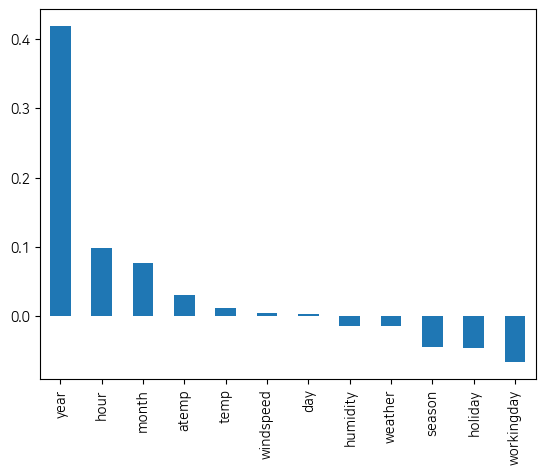

In [89]:
pd.Series(lr_reg.coef_, index=x.columns).sort_values(ascending=False).plot(kind='bar')
# 회귀모델은 데이터의 값이 클수록(예시: year 데이터는 2000이 넘음) 상관계수가 높다고 나와버림 --> 원핫인코딩 할 것(더미로 함)

In [90]:
x.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [91]:
x_ohe = pd.get_dummies(x, columns=['season', 'holiday', 'workingday', 'weather','year', 'month', 'day', 'hour'], dtype=int)
x_ohe


,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,14.395,81,0.0000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,9.02,13.635,80,0.0000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,9.02,13.635,80,0.0000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9.84,14.395,75,0.0000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.84,14.395,75,0.0000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
10882,14.76,17.425,57,15.0013,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
10883,13.94,15.910,61,15.0013,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
10884,13.94,17.425,61,6.0032,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [94]:
X_train, X_test, y_train, y_test = train_test_split(x_ohe, y_log, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
y_test_t = np.expm1(y_test)
pred_t = np.expm1(pred)
evaluate_regr(y_test_t,pred_t)

rmsle:	0.5896346375747998
rmse:	97.68804411871898
mae:	63.38200887075318


<Axes: >

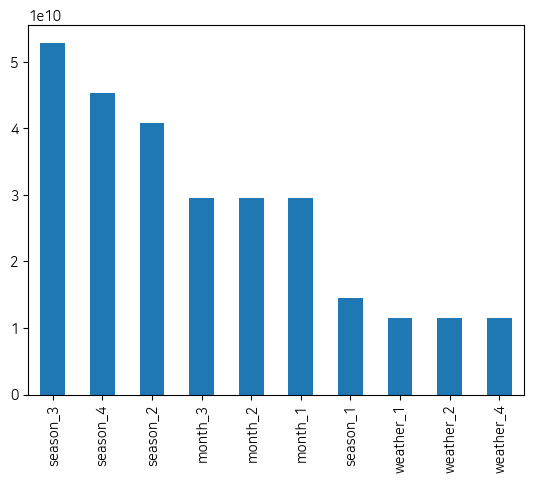

In [93]:
pd.Series(lr_reg.coef_, index=x_ohe.columns).sort_values(ascending=False)[:10].plot(kind='bar')